In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
##Reading the columns and printing the colums and row information
df = pd.read_csv("../../data/insurance.csv")
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.') #f string 

df.head()

There are 1338 rows and 7 columns.


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 57.6+ KB


In [5]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

### Converting object into catagorical all at once

In [6]:
## Converting object into catagorical all at once
for colname in df.columns[df.dtypes == object]:
    df[colname] = df[colname].astype("category")
df.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.0 KB


### Checking for null values in the column with sorted in decending order.

In [7]:
## checking for null values
df.isnull().sum().sort_values(ascending=False)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

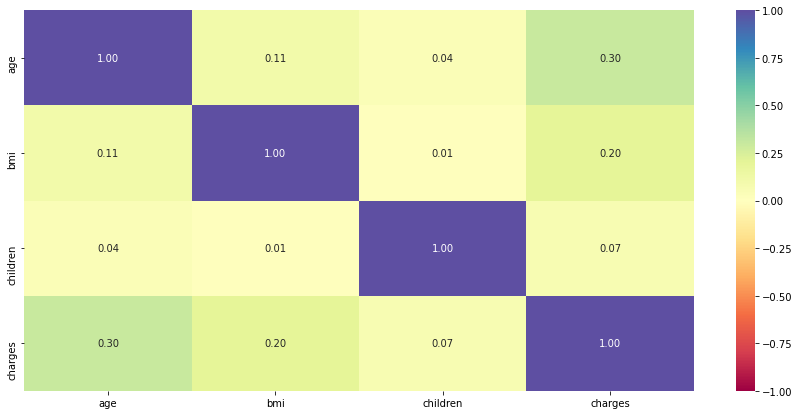

In [8]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### Q 3 What percentage of policy holders have no children?

In [9]:
count_no_children =  df[df["children"]==0].count()
children_total = df["children"].count()

print(f'policy holder with 0 chldrn {count_no_children} and total count of children {children_total}')

percentage = (count_no_children/children_total) * 100
print(percentage)


policy holder with 0 chldrn age         574
sex         574
bmi         574
children    574
smoker      574
region      574
charges     574
dtype: int64 and total count of children 1338
age         42.899851
sex         42.899851
bmi         42.899851
children    42.899851
smoker      42.899851
region      42.899851
charges     42.899851
dtype: float64


### Q4 What does the distribution of bmi look like after applying the log transformation on it?

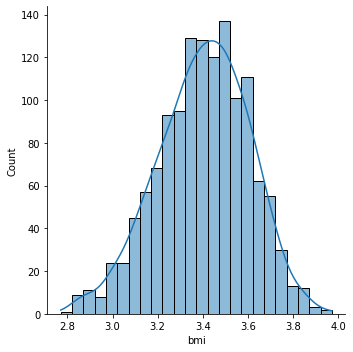

In [10]:
sns.displot(np.log(df.bmi), kde=True)

### Q5 The customers from which region have the highest median insurance charge?

In [11]:
df.groupby('region').charges.median()

region
northeast    10057.652025
northwest     8965.795750
southeast     9294.131950
southwest     8798.593000
Name: charges, dtype: float64

### Q6 What is the correlation between age and charges?

In [12]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


### Q7 Create dummy variables for the categorical columns using pd.get_dummies() with drop_first=True. A dummy variable is dropped for which of the following regions?

In [13]:
dummy_data = pd.get_dummies(df, columns=['sex','smoker','region'], drop_first=True)
dummy_data.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


### Q8 Split the data in a 70:30 ratio to obtain the train and test sets. How many rows are there in the test set?

In [17]:
import statsmodels.api as sm
# lets build our linear model
# independant variables
X = dummy_data.drop(['charges'], axis=1)
X = sm.add_constant(X)
# the dependent variable
y = dummy_data[['charges']]

# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
X_test.shape


(402, 9)

### Q9 Build a linear regression model using statsmodels OLS and the train set. Which of the following is true regarding the intercept?

In [18]:
linear_regression = sm.OLS(y_train, X_train)
lr_sm = linear_regression.fit()
print(lr_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     356.2
Date:                Tue, 17 Aug 2021   Prob (F-statistic):          1.27e-276
Time:                        00:08:37   Log-Likelihood:                -9477.0
No. Observations:                 936   AIC:                         1.897e+04
Df Residuals:                     927   BIC:                         1.902e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.104e+04   1172.364  

In [22]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -11039.238418561517


### 10 Which of the following is true regarding the adjusted R-squared of the model?

#### Adj. R-squared:                  0.752

### Q11 How many attributes (excluding the constant/intercept term) have a VIF > 5?
 **General Rule of thumb**:
    - If VIF is between 1 and 5, then there is low multicollinearity.
    - If VIF is between 5 and 10, we say there is moderate multicollinearity.
    - If VIF is exceeding 10, it shows signs of high multicollinearity.

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [26]:
## 0 attributes has VIF > 5 
checking_vif(X_train)

,feature,VIF
0,const,34.929146
1,age,1.017392
2,bmi,1.103774
3,children,1.005975
4,sex_male,1.008544
5,smoker_yes,1.006921
6,region_northwest,1.526081
7,region_southeast,1.652557
8,region_southwest,1.557593


### Q12 How many attributes have a p-value greater than 0.05?

In [40]:
# sex_male 0.478
# region_northwest 0.597
# region_southeast 0.104
# region_southwest 0.126

lr_sm.pvalues

const                3.594046e-20
age                  2.944787e-60
bmi                  3.705717e-20
children             3.437391e-02
sex_male             4.781365e-01
smoker_yes          6.125578e-259
region_northwest     5.971764e-01
region_southeast     1.043686e-01
region_southwest     1.260428e-01
dtype: float64

 ### Q 13 Drop the variables having a p-value greater than 0.05, and apply the goldfeldquant test to check whether the residuals are homoscedastic or not. Which of the following is true for the p-value of the test?

In [50]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

X_train1 = X_train.drop(['sex_male','region_northwest','region_southeast','region_southwest'], axis=1)
X_test1 = X_test.drop(['sex_male','region_northwest','region_southeast','region_southwest'], axis=1)

linear_regression1 = sm.OLS(y_train, X_train1)
lr_sm1 = linear_regression1.fit()
residual1 = lr_sm1.resid

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(residual1, X_train1)
lzip(name, test)

[('F statistic', 0.9766405049171404), ('p-value', 0.6003139612490169)]

### Q 14 Which of the following is true about the RMSE on the test set after dropping the variables having a p-value greater than 0.05?

In [51]:
y_pred = lr_sm1.predict(X_test1)
np.sqrt(mean_squared_error(y_test, y_pred))

6079.4760694545685